**Kelompok 8 Data understanding dan preprocessing**


Data Understanding:Data Understanding (Pemahaman Data) adalah tahap awal dalam siklus pengembangan model dalam machine learning. Tujuannya adalah untuk mendapatkan wawasan mendalam tentang data yang akan digunakan untuk melatih dan menguji model.

Preprocessing:Preprocessing (pra-pemrosesan) adalah serangkaian langkah atau teknik yang dilakukan pada data sebelum data tersebut digunakan 
untuk melatih model dalam machine learning atau analisis data statistik.

UNTUK HOLD-OUT =80:20

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('D:/PROYEK PM'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

D:/PROYEK PM\08_PERFORMANCE MEASURES-HOLD-OT_80 dan 20.ipynb
D:/PROYEK PM\08_PERFORMANCE MEASURES-HOLD-OT_90 dan 10.ipynb
D:/PROYEK PM\test.csv
D:/PROYEK PM\train.csv
D:/PROYEK PM\test_thumbnails\41_thumbnail.png
D:/PROYEK PM\train_thumbnails\10077_thumbnail.png
D:/PROYEK PM\train_thumbnails\10143_thumbnail.png
D:/PROYEK PM\train_thumbnails\1020_thumbnail.png
D:/PROYEK PM\train_thumbnails\10246_thumbnail.png
D:/PROYEK PM\train_thumbnails\10252_thumbnail.png
D:/PROYEK PM\train_thumbnails\10469_thumbnail.png
D:/PROYEK PM\train_thumbnails\10548_thumbnail.png
D:/PROYEK PM\train_thumbnails\10642_thumbnail.png
D:/PROYEK PM\train_thumbnails\10800_thumbnail.png
D:/PROYEK PM\train_thumbnails\1080_thumbnail.png
D:/PROYEK PM\train_thumbnails\10896_thumbnail.png
D:/PROYEK PM\train_thumbnails\1101_thumbnail.png
D:/PROYEK PM\train_thumbnails\11263_thumbnail.png
D:/PROYEK PM\train_thumbnails\11417_thumbnail.png
D:/PROYEK PM\train_thumbnails\11431_thumbnail.png
D:/PROYEK PM\train_thumbnails\11557_thum

In [4]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , auc
from sklearn.model_selection import train_test_split

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub 

In [5]:
train_df = pd.read_csv("D:PROYEK PM/train.csv")
train_df

,image_id,label,image_width,image_height,is_tma
0,4,HGSC,23785,20008,False
1,66,LGSC,48871,48195,False
2,91,HGSC,3388,3388,True
3,281,LGSC,42309,15545,False
4,286,EC,37204,30020,False
...,...,...,...,...,...
533,65022,LGSC,53355,46675,False
534,65094,MC,55042,45080,False
535,65300,HGSC,75860,27503,False
536,65371,HGSC,42551,41800,False


In [6]:
train_df.nunique()

image_id        538
label             5
image_width     508
image_height    508
is_tma            2
dtype: int64

In [7]:
train_df.describe()

,image_id,image_width,image_height
count,538.000000,538.000000,538.000000
mean,32194.340149,48859.533457,29729.460967
std,18774.950592,20040.989927,10762.899796
min,4.000000,2964.000000,2964.000000
25%,15881.250000,34509.000000,22089.500000
50%,32152.000000,48160.000000,29732.000000
75%,47892.500000,64143.750000,37880.750000
max,65533.000000,105763.000000,50155.000000


In [8]:
train_df['label'].value_counts()

label
HGSC    222
EC      124
CC       99
LGSC     47
MC       46
Name: count, dtype: int64

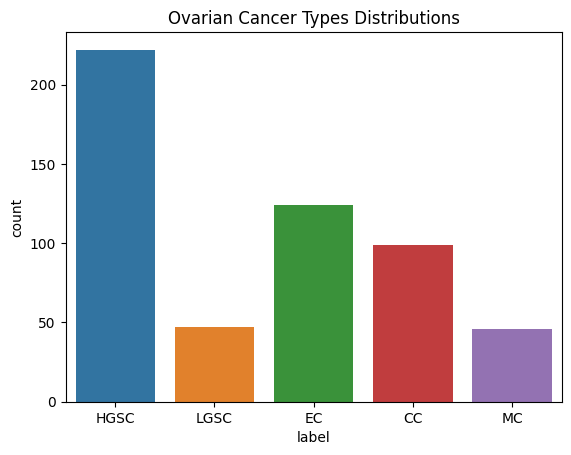

In [9]:
sns.countplot(data=train_df, x="label")
plt.title("Ovarian Cancer Types Distributions")
plt.show()

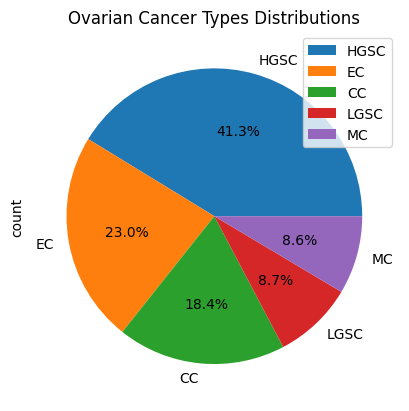

In [10]:
train_df['label'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("Ovarian Cancer Types Distributions")
plt.legend()
plt.show()

In [11]:
train_df.head()

,image_id,label,image_width,image_height,is_tma
0,4,HGSC,23785,20008,False
1,66,LGSC,48871,48195,False
2,91,HGSC,3388,3388,True
3,281,LGSC,42309,15545,False
4,286,EC,37204,30020,False


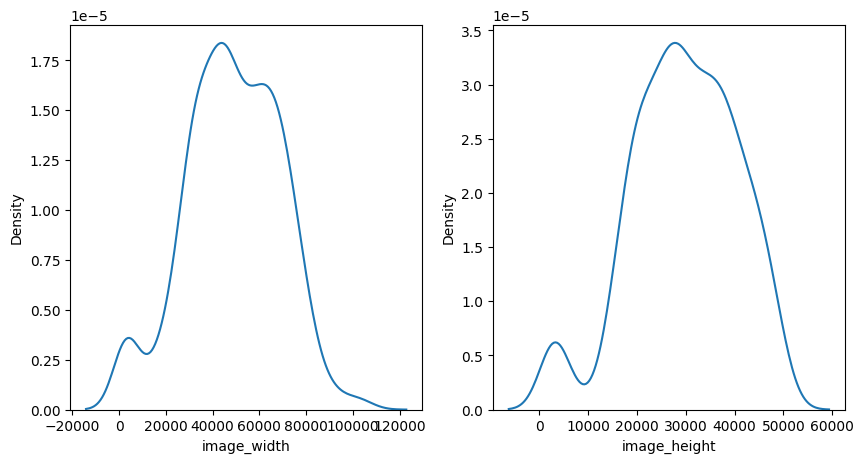

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.kdeplot(train_df['image_width'])
plt.subplot(1,2,2)
sns.kdeplot(train_df['image_height'])
plt.show()

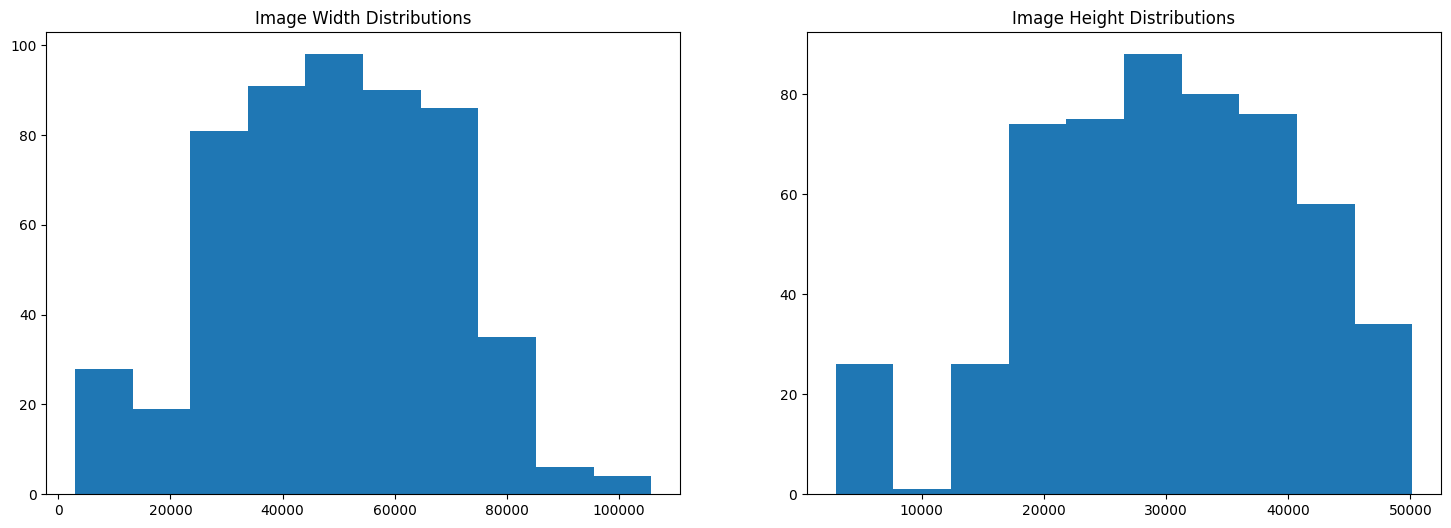

In [13]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.hist(x=train_df['image_width'])
plt.title("Image Width Distributions")
plt.subplot(1,2,2)
plt.hist(x=train_df['image_height'])
plt.title("Image Height Distributions")
plt.show()

In [14]:
train_df['image_width'].describe()

count       538.000000
mean      48859.533457
std       20040.989927
min        2964.000000
25%       34509.000000
50%       48160.000000
75%       64143.750000
max      105763.000000
Name: image_width, dtype: float64

In [15]:
train_df['image_height'].describe()

count      538.000000
mean     29729.460967
std      10762.899796
min       2964.000000
25%      22089.500000
50%      29732.000000
75%      37880.750000
max      50155.000000
Name: image_height, dtype: float64

In [16]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_id      538 non-null    int64 
 1   label         538 non-null    object
 2   image_width   538 non-null    int64 
 3   image_height  538 non-null    int64 
 4   is_tma        538 non-null    bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 17.5+ KB


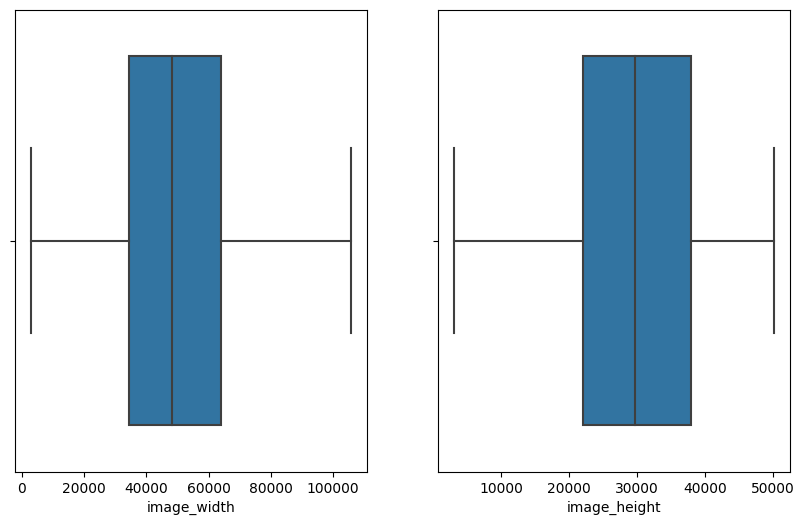

In [17]:
plt.figure(figsize=(10,6)) 
plt.subplot(1,2,1)
sns.boxplot(data=train_df,x="image_width")
plt.subplot(1,2,2)
sns.boxplot(data=train_df,x="image_height")
plt.show()


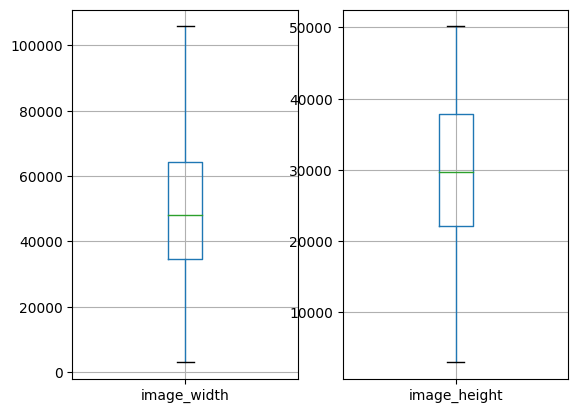

In [18]:
plt.subplot(1,2,1)
train_df[['image_width']].boxplot()
plt.subplot(1,2,2)
train_df[['image_height']].boxplot()
plt.show()

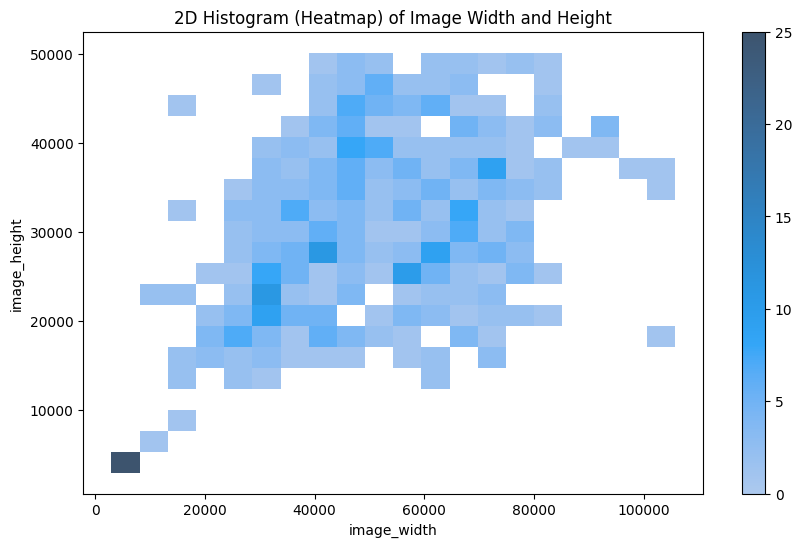

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x="image_width", y="image_height", bins=20, cbar=True)
plt.title("2D Histogram (Heatmap) of Image Width and Height")
plt.show()


In [20]:
path_train = "D:/PROYEK PM/train_thumbnails"
path_test = "D:/PROYEK PM/test_thumbnails"
train_folder = os.listdir(path_train)
test_folder = os.listdir(path_test)

print(len(train_folder))
print(len(test_folder))

514
1


In [21]:
train_folder[:5]

['10077_thumbnail.png',
 '10143_thumbnail.png',
 '1020_thumbnail.png',
 '10246_thumbnail.png',
 '10252_thumbnail.png']

In [22]:
test_folder

['41_thumbnail.png']

In [23]:
train_df

,image_id,label,image_width,image_height,is_tma
0,4,HGSC,23785,20008,False
1,66,LGSC,48871,48195,False
2,91,HGSC,3388,3388,True
3,281,LGSC,42309,15545,False
4,286,EC,37204,30020,False
...,...,...,...,...,...
533,65022,LGSC,53355,46675,False
534,65094,MC,55042,45080,False
535,65300,HGSC,75860,27503,False
536,65371,HGSC,42551,41800,False


In [24]:
train_df['is_tma'].value_counts()

is_tma
False    513
True      25
Name: count, dtype: int64

In [25]:
## Image id >> Tissue Microarray
train_df_tma = train_df[train_df['is_tma']==True]

In [26]:
train_df_tma

,image_id,label,image_width,image_height,is_tma
2,91,HGSC,3388,3388,True
37,4134,MC,2964,2964,True
76,8280,HGSC,2964,2964,True
83,9200,MC,3388,3388,True
112,13568,LGSC,2964,2964,True
149,17637,HGSC,2964,2964,True
176,21020,MC,3388,3388,True
236,29084,LGSC,3388,3388,True
263,31594,EC,3388,3388,True
288,35565,MC,2964,2964,True


In [27]:
train_df_no_tma = train_df[train_df['is_tma']==False]
train_df_no_tma

,image_id,label,image_width,image_height,is_tma
0,4,HGSC,23785,20008,False
1,66,LGSC,48871,48195,False
3,281,LGSC,42309,15545,False
4,286,EC,37204,30020,False
5,431,HGSC,39991,40943,False
...,...,...,...,...,...
533,65022,LGSC,53355,46675,False
534,65094,MC,55042,45080,False
535,65300,HGSC,75860,27503,False
536,65371,HGSC,42551,41800,False


In [28]:
train_df_no_tma['image_id_path'] = [f"{i}_thumbnail.png" for i in train_df_no_tma['image_id']]

In [29]:
train_df_no_tma

,image_id,label,image_width,image_height,is_tma,image_id_path
0,4,HGSC,23785,20008,False,4_thumbnail.png
1,66,LGSC,48871,48195,False,66_thumbnail.png
3,281,LGSC,42309,15545,False,281_thumbnail.png
4,286,EC,37204,30020,False,286_thumbnail.png
5,431,HGSC,39991,40943,False,431_thumbnail.png
...,...,...,...,...,...,...
533,65022,LGSC,53355,46675,False,65022_thumbnail.png
534,65094,MC,55042,45080,False,65094_thumbnail.png
535,65300,HGSC,75860,27503,False,65300_thumbnail.png
536,65371,HGSC,42551,41800,False,65371_thumbnail.png


In [30]:
train_df_tma['image_id_path'] = [f"{i}.png" for i in train_df_tma['image_id']]

In [31]:
train_df_tma


,image_id,label,image_width,image_height,is_tma,image_id_path
2,91,HGSC,3388,3388,True,91.png
37,4134,MC,2964,2964,True,4134.png
76,8280,HGSC,2964,2964,True,8280.png
83,9200,MC,3388,3388,True,9200.png
112,13568,LGSC,2964,2964,True,13568.png
149,17637,HGSC,2964,2964,True,17637.png
176,21020,MC,3388,3388,True,21020.png
236,29084,LGSC,3388,3388,True,29084.png
263,31594,EC,3388,3388,True,31594.png
288,35565,MC,2964,2964,True,35565.png


## Train Images data Preprocessing

In [32]:
train_folder[:5]

['10077_thumbnail.png',
 '10143_thumbnail.png',
 '1020_thumbnail.png',
 '10246_thumbnail.png',
 '10252_thumbnail.png']

In [33]:
train_df.head()



,image_id,label,image_width,image_height,is_tma
0,4,HGSC,23785,20008,False
1,66,LGSC,48871,48195,False
2,91,HGSC,3388,3388,True
3,281,LGSC,42309,15545,False
4,286,EC,37204,30020,False


In [34]:
train_folder[:5]  

['10077_thumbnail.png',
 '10143_thumbnail.png',
 '1020_thumbnail.png',
 '10246_thumbnail.png',
 '10252_thumbnail.png']

In [35]:
train_df_tma

,image_id,label,image_width,image_height,is_tma,image_id_path
2,91,HGSC,3388,3388,True,91.png
37,4134,MC,2964,2964,True,4134.png
76,8280,HGSC,2964,2964,True,8280.png
83,9200,MC,3388,3388,True,9200.png
112,13568,LGSC,2964,2964,True,13568.png
149,17637,HGSC,2964,2964,True,17637.png
176,21020,MC,3388,3388,True,21020.png
236,29084,LGSC,3388,3388,True,29084.png
263,31594,EC,3388,3388,True,31594.png
288,35565,MC,2964,2964,True,35565.png


In [36]:
print(train_df['image_width'].min())
print(train_df['image_width'].max())
print(train_df['image_width'].mean())
print()
print(train_df['image_height'].min())
print(train_df['image_height'].max())
print(train_df['image_height'].mean())

2964
105763
48859.53345724907

2964
50155
29729.460966542752


In [37]:
train_df_no_tma

,image_id,label,image_width,image_height,is_tma,image_id_path
0,4,HGSC,23785,20008,False,4_thumbnail.png
1,66,LGSC,48871,48195,False,66_thumbnail.png
3,281,LGSC,42309,15545,False,281_thumbnail.png
4,286,EC,37204,30020,False,286_thumbnail.png
5,431,HGSC,39991,40943,False,431_thumbnail.png
...,...,...,...,...,...,...
533,65022,LGSC,53355,46675,False,65022_thumbnail.png
534,65094,MC,55042,45080,False,65094_thumbnail.png
535,65300,HGSC,75860,27503,False,65300_thumbnail.png
536,65371,HGSC,42551,41800,False,65371_thumbnail.png


In [38]:
image_data = []
image_label = []
path = "D:/PROYEK PM/train_thumbnails"

for img , label in zip(train_df_no_tma['image_id_path'],train_df_no_tma['label']):
    image = Image.open("D:/PROYEK PM/train_thumbnails/"+img)
    image = image.resize((224,224))
    image = image.convert("RGB")
    image = np.array(image)
    image_data.append(image)
    image_label.append(label)



In [39]:
print(len(image_data))
print(len(image_label))

513
513


In [40]:
set(image_label)


{'CC', 'EC', 'HGSC', 'LGSC', 'MC'}

In [41]:
image_label_1 = []
for i in image_label:
    if i=="CC":
        image_label_1.append(0)
    elif i=="EC":
        image_label_1.append(1)
    elif i=="HGSC":
        image_label_1.append(2)
    elif i=="LGSC":
        image_label_1.append(3)
    elif i=="MC":
        image_label_1.append(4)

In [42]:
len(image_label_1)

513

In [43]:
image_label_1[:5]

[2, 3, 3, 1, 2]

In [44]:
x = np.array(image_data)
y = np.array(image_label_1)

In [45]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(410, 224, 224, 3)
(103, 224, 224, 3)
(410,)
(103,)


In [46]:
x_train

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [47]:
y_train

array([0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 0, 3, 0, 2, 2, 3, 0, 2, 1, 0, 2, 0,
       0, 0, 3, 0, 1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0,
       4, 1, 2, 0, 0, 2, 2, 2, 3, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2, 4, 1,
       1, 2, 3, 1, 2, 0, 2, 3, 1, 2, 0, 1, 3, 0, 2, 2, 1, 4, 1, 2, 3, 0,
       1, 1, 4, 1, 0, 2, 1, 1, 0, 1, 4, 2, 3, 1, 2, 4, 2, 0, 2, 0, 1, 1,
       2, 2, 2, 1, 4, 1, 2, 0, 4, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 1, 2, 2,
       2, 0, 1, 2, 3, 2, 2, 1, 0, 2, 0, 2, 2, 3, 2, 3, 1, 1, 2, 0, 0, 4,
       1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 3, 2, 4, 3, 2, 0, 4, 1, 1,
       0, 2, 2, 0, 0, 3, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 4, 0, 4, 2, 2, 2, 2, 2, 1, 2, 4, 1, 2, 2, 3, 0, 2, 3, 3,
       1, 1, 2, 2, 2, 3, 3, 2, 0, 3, 4, 4, 3, 2, 2, 2, 0, 0, 4, 0, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 4, 1, 1, 1, 0, 1,
       2, 0, 2, 4, 0, 1, 2, 2, 2, 2, 4, 3, 3, 1, 2, 2, 2, 1, 2, 2, 4, 3,
       2, 2, 2, 1, 4, 1, 2, 1, 3, 2, 4, 1, 0, 3, 2,

In [48]:
x_test

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

In [49]:
y_test

array([2, 4, 4, 4, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 3, 0, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 4, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 1, 0, 1, 4,
       2, 1, 2, 2, 4, 2, 0, 2, 2, 0, 1, 4, 2, 2, 4, 1, 2, 1, 2, 2, 0, 1,
       4, 1, 3, 4, 0, 4, 0, 2, 2, 2, 2, 0, 4, 0, 2, 0, 4, 0, 1, 2, 0, 3,
       4, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 3, 0, 0, 0])

In [50]:
model = Sequential()
model.add(Conv2D(filters=120,kernel_size=(3,3),strides=(1,1),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=100,kernel_size=(3,3),strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=80,kernel_size=(3,3),strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
   
model.add(Conv2D(filters=40,kernel_size=(3,3),strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=600,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=600,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=5,activation='softmax'))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 120)     3360      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 120)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 100)     108100    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 100)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 80)        72080     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 80)       

In [51]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
epochs = 10
ThisModel = model.fit(x_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/10

7/7 [==============================] - 110s 15s/step - loss: 10.7949 - accuracy: 0.2707
Epoch 2/10
7/7 [==============================] - 86s 12s/step - loss: 1.5398 - accuracy: 0.4024
Epoch 3/10
7/7 [==============================] - 38s 5s/step - loss: 1.4554 - accuracy: 0.4049
Epoch 4/10
7/7 [==============================] - 45s 7s/step - loss: 1.3946 - accuracy: 0.4341
Epoch 5/10
7/7 [==============================] - 64s 9s/step - loss: 1.3989 - accuracy: 0.4366
Epoch 6/10
7/7 [==============================] - 56s 8s/step - loss: 1.3542 - accuracy: 0.4366
Epoch 7/10
7/7 [==============================] - 54s 8s/step - loss: 1.3151 - accuracy: 0.4463
Epoch 8/10
7/7 [==============================] - 63s 8s/step - loss: 1.2732 - accuracy: 0.4683
Epoch 9/10
7/7 [==============================] - 48s 7s/step - loss: 1.2299 - accuracy: 0.4976
Epoch 10/10
7/7 [==============================] - 108s 16s/step - loss: 1.1365 - accuracy: 0.5341


In [53]:
ModelLoss, ModelAccuracy = model.evaluate(x_train, y_train)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

13/13 [==============================] - 15s 977ms/step - loss: 0.9975 - accuracy: 0.6610
Test Loss is 0.9975442886352539
Test Accuracy is 0.6609756350517273


In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Assuming you have trained your model and made predictions on the training set
predictions = model.predict(x_train)
y_pred = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to class labels for the training set
y_true = np.argmax(y_train, axis=1) if len(y_train.shape) > 1 else y_train

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print the results
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('F1-Score: {:.4f}'.format(f1))


13/13 [==============================] - 12s 912ms/step
Precision: 0.7008
Recall: 0.6610
F1-Score: 0.6271
